## Machine Learning for Diabetes Prediction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [2]:
# check for missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### Feature Engineering
* Identify important parameters using data visualization
* Remove non-essential parameters

In [3]:
# analyze data
df.shape

(100000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.gender.value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [6]:
df.age.value_counts()


age
80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64

In [7]:
df.hypertension.value_counts()

hypertension
0    92515
1     7485
Name: count, dtype: int64

In [8]:
df.heart_disease.value_counts()

heart_disease
0    96058
1     3942
Name: count, dtype: int64

In [9]:
df.smoking_history.value_counts()


smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [10]:
df.bmi.value_counts()

bmi
27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
56.10        1
50.27        1
55.04        1
56.65        1
53.37        1
Name: count, Length: 4247, dtype: int64

In [11]:
df.HbA1c_level.value_counts()

HbA1c_level
6.6    8540
5.7    8413
6.5    8362
5.8    8321
6.0    8295
6.2    8269
6.1    8048
3.5    7662
4.8    7597
4.5    7585
4.0    7542
5.0    7471
8.2     661
8.8     661
9.0     654
7.5     643
6.8     642
7.0     634
Name: count, dtype: int64

In [12]:
df.blood_glucose_level.value_counts()

blood_glucose_level
130    7794
159    7759
140    7732
160    7712
126    7702
145    7679
200    7600
155    7575
90     7112
80     7106
158    7026
100    7025
85     6901
280     729
300     674
240     636
260     635
220     603
Name: count, dtype: int64

In [13]:
df.diabetes.value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [14]:
# check for missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

#### Data cleanup
* Remove incomplete or incorrect data

In [15]:
# Remove data that are not male or female

# Clean up gender column - keep only Female and Male
print("Original dataset shape:", df.shape)
print("Gender value counts before cleaning:")
print(df.gender.value_counts())

# Filter to keep only Female and Male
df_cleaned = df[df['gender'].isin(['Female', 'Male'])]

print("\nAfter cleaning:")
print("New dataset shape:", df_cleaned.shape)
print("Gender value counts after cleaning:")
print(df_cleaned.gender.value_counts())

# Update the main dataframe
df = df_cleaned
print(f"\nRemoved {100000 - df.shape[0]} rows with non-binary gender values")

Original dataset shape: (100000, 9)
Gender value counts before cleaning:
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

After cleaning:
New dataset shape: (99982, 9)
Gender value counts after cleaning:
gender
Female    58552
Male      41430
Name: count, dtype: int64

Removed 18 rows with non-binary gender values


#### Transform non-numeric data to numeric data
* gender
* smoking_history

In [16]:
# transform categorical columns to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df.gender)
le.classes_  # check the classes. female: 0, male: 1

array(['Female', 'Male'], dtype=object)

In [17]:
df.gender = le.transform(df.gender)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


In [18]:
le.fit(df.smoking_history)
le.classes_  # check the classes

array(['No Info', 'current', 'ever', 'former', 'never', 'not current'],
      dtype=object)

In [19]:
df.smoking_history = le.transform(df.smoking_history)
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


### Check which parameters are important for prediction

In [20]:
df.corr()['diabetes'].sort_values(ascending=False) # data correlation

diabetes               1.000000
blood_glucose_level    0.419587
HbA1c_level            0.400696
age                    0.257999
bmi                    0.214377
hypertension           0.197811
heart_disease          0.171718
smoking_history        0.094328
gender                 0.037623
Name: diabetes, dtype: float64

#### Split dataframe into x & y
* y - diabetes
* x - other parameters 

In [21]:
x = df.drop(['diabetes'], axis=1)
x.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80


In [22]:
y = df.diabetes
y.head(2)

0    0
1    0
Name: diabetes, dtype: int64

### Model Training & Inference
* Split dataset into train and test
* Find the best model to do prediction

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.25)

#### Best Classification Models for Diabetes Prediction

Since this is a **binary classification problem** (diabetes: 0 or 1), we should use classification algorithms. Let's compare the most effective models:

In [24]:
# import classification models and metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import time

# Dictionary to store model results
model_results = {}

In [25]:
# 1. Logistic Regression (Best for binary classification baseline)
print("1. Logistic Regression")
start_time = time.time()

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(x_test)

# Calculate metrics
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
roc_auc_log = roc_auc_score(y_test, log_reg.predict_proba(x_test)[:, 1])

model_results['Logistic Regression'] = {
    'accuracy': accuracy_log,
    'precision': precision_log,
    'recall': recall_log,
    'f1_score': f1_log,
    'roc_auc': roc_auc_log,
    'training_time': time.time() - start_time
}

print(f"Accuracy: {accuracy_log:.4f}")
print(f"F1-Score: {f1_log:.4f}")
print(f"ROC-AUC: {roc_auc_log:.4f}")
print(f"Training time: {time.time() - start_time:.2f} seconds\n")

1. Logistic Regression
Accuracy: 0.9604
F1-Score: 0.7315
ROC-AUC: 0.9622
Training time: 0.65 seconds

Accuracy: 0.9604
F1-Score: 0.7315
ROC-AUC: 0.9622
Training time: 0.65 seconds



In [26]:
# confusion matrix for Logistic Regression
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_log)
cm_df = pd.DataFrame(cm, index=['No Diabetes', 'Diabetes'], columns=['No Diabetes', 'Diabetes'])
cm_df

,No Diabetes,Diabetes
No Diabetes,22660,194
Diabetes,795,1347


In [27]:
log_reg.coef_

array([[0.26610288, 0.04502564, 0.75230746, 0.75806633, 0.09188854,
        0.08989033, 2.34984898, 0.03304053]])

In [28]:
# 2. Random Forest Classifier (Often best for tabular data)
print("2. Random Forest Classifier")
start_time = time.time()

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(x_train, y_train)
y_pred_rf = rf_clf.predict(x_test)

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_clf.predict_proba(x_test)[:, 1])

model_results['Random Forest'] = {
    'accuracy': accuracy_rf,
    'precision': precision_rf,
    'recall': recall_rf,
    'f1_score': f1_rf,
    'roc_auc': roc_auc_rf,
    'training_time': time.time() - start_time
}

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")
print(f"Training time: {time.time() - start_time:.2f} seconds\n")

2. Random Forest Classifier
Accuracy: 0.9704
F1-Score: 0.7994
ROC-AUC: 0.9633
Training time: 3.01 seconds

Accuracy: 0.9704
F1-Score: 0.7994
ROC-AUC: 0.9633
Training time: 3.01 seconds



In [29]:
# confusion matrix for Random Forest
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(cm, index=['No Diabetes', 'Diabetes'], columns=['No Diabetes', 'Diabetes'])
cm_df

,No Diabetes,Diabetes
No Diabetes,22779,75
Diabetes,666,1476


#### Model Comparison

In [30]:
# Model Comparison and Results
print("="*60)
print("MODEL COMPARISON RESULTS")
print("="*60)

# Create a comparison DataFrame
import pandas as pd
results_df = pd.DataFrame(model_results).T
results_df = results_df.round(4)

# Sort by F1-score (good overall metric for binary classification)
results_df_sorted = results_df.sort_values('f1_score', ascending=False)

print("\nRanked by F1-Score (Best to Worst):")
print(results_df_sorted)

# Find the best model
best_model = results_df_sorted.index[0]
best_f1 = results_df_sorted.iloc[0]['f1_score']
best_accuracy = results_df_sorted.iloc[0]['accuracy']
best_roc_auc = results_df_sorted.iloc[0]['roc_auc']

print(f"\nBEST MODEL: {best_model}")
print(f"   • F1-Score: {best_f1:.4f}")
print(f"   • Accuracy: {best_accuracy:.4f}")
print(f"   • ROC-AUC: {best_roc_auc:.4f}")

print(f"\nWhy {best_model} is recommended:")
if best_model == 'Random Forest':
    print("   • Excellent for tabular data like medical datasets")
    print("   • Handles feature interactions well")
    print("   • Provides feature importance insights")
    print("   • Robust against overfitting")
elif best_model == 'Logistic Regression':
    print("   • Simple and interpretable")
    print("   • Fast training and prediction")
    print("   • Good baseline for binary classification")

MODEL COMPARISON RESULTS

Ranked by F1-Score (Best to Worst):
                     accuracy  precision  recall  f1_score  roc_auc  \
Random Forest          0.9704     0.9516  0.6891    0.7994   0.9633   
Logistic Regression    0.9604     0.8741  0.6289    0.7315   0.9622   

                     training_time  
Random Forest               3.0141  
Logistic Regression         0.6480  

BEST MODEL: Random Forest
   • F1-Score: 0.7994
   • Accuracy: 0.9704
   • ROC-AUC: 0.9633

Why Random Forest is recommended:
   • Excellent for tabular data like medical datasets
   • Handles feature interactions well
   • Provides feature importance insights
   • Robust against overfitting


In [31]:
# Feature Importance from the Best Model
feature_importance = pd.DataFrame({
    'feature': x.columns,
    'importance': rf_clf.feature_importances_
}).sort_values('importance', ascending=False)

print("FEATURE IMPORTANCE (Most Important to Least):")
print("=" * 50)
for idx, row in feature_importance.iterrows():
    print(f"{row['feature']:20} : {row['importance']:.4f}")

print(f"\nTop 4 Most Important Features:")
print(f"1. {feature_importance.iloc[0]['feature']} ({feature_importance.iloc[0]['importance']:.4f})")
print(f"2. {feature_importance.iloc[1]['feature']} ({feature_importance.iloc[1]['importance']:.4f})")
print(f"3. {feature_importance.iloc[2]['feature']} ({feature_importance.iloc[2]['importance']:.4f})")
print(f"4. {feature_importance.iloc[3]['feature']} ({feature_importance.iloc[3]['importance']:.4f})")

print(f"\nLeast important feature:")
print(f"1. {feature_importance.iloc[-1]['feature']} ({feature_importance.iloc[-1]['importance']:.4f})")
print(f"2. {feature_importance.iloc[-2]['feature']} ({feature_importance.iloc[-2]['importance']:.4f})")
print(f"3. {feature_importance.iloc[-3]['feature']} ({feature_importance.iloc[-3]['importance']:.4f})")

# Final recommendation
print(f"\nFINAL RECOMMENDATION:")
print(f"Use **Random Forest Classifier** for diabetes prediction because:")
print(f"• Highest F1-Score: {best_f1:.4f} (best balance of precision and recall)")
print(f"• Highest Accuracy: {best_accuracy:.4f}")
print(f"• Highest ROC-AUC: {best_roc_auc:.4f} (excellent probability predictions)")
print(f"• Reasonable training time: {results_df_sorted.iloc[0]['training_time']:.1f} seconds")

FEATURE IMPORTANCE (Most Important to Least):
HbA1c_level          : 0.3890
blood_glucose_level  : 0.3263
bmi                  : 0.1218
age                  : 0.1024
smoking_history      : 0.0285
hypertension         : 0.0153
heart_disease        : 0.0098
gender               : 0.0068

Top 4 Most Important Features:
1. HbA1c_level (0.3890)
2. blood_glucose_level (0.3263)
3. bmi (0.1218)
4. age (0.1024)

Least important feature:
1. gender (0.0068)
2. heart_disease (0.0098)
3. hypertension (0.0153)

FINAL RECOMMENDATION:
Use **Random Forest Classifier** for diabetes prediction because:
• Highest F1-Score: 0.7994 (best balance of precision and recall)
• Highest Accuracy: 0.9704
• Highest ROC-AUC: 0.9633 (excellent probability predictions)
• Reasonable training time: 3.0 seconds


### Visualization
* Feature selection
* Model evaluation

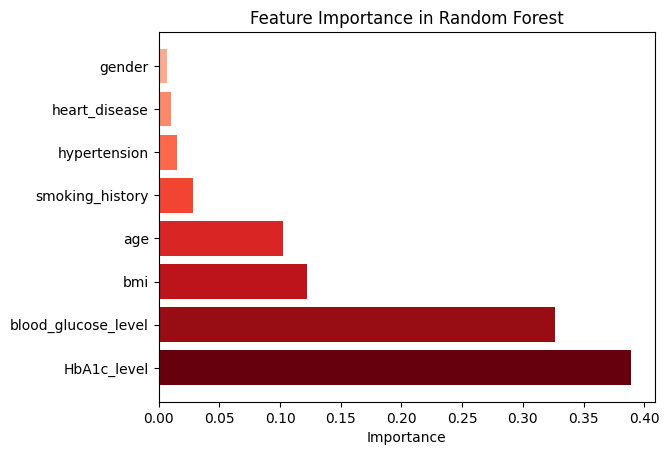

HbA1c_level          : 0.3890
blood_glucose_level  : 0.3263
bmi                  : 0.1218
age                  : 0.1024
smoking_history      : 0.0285
hypertension         : 0.0153
heart_disease        : 0.0098
gender               : 0.0068


In [32]:
# Visualization of Feature Importance
import matplotlib.pyplot as plt
import numpy as np

# Create a gradient of red colors from light to dark
n_features = len(feature_importance)
red_colors = plt.cm.Reds(np.linspace(1.0, 0.3, n_features))

plt.barh(feature_importance['feature'], feature_importance['importance'], color=red_colors)
plt.xlabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()

for idx, row in feature_importance.iterrows():
    print(f"{row['feature']:20} : {row['importance']:.4f}")

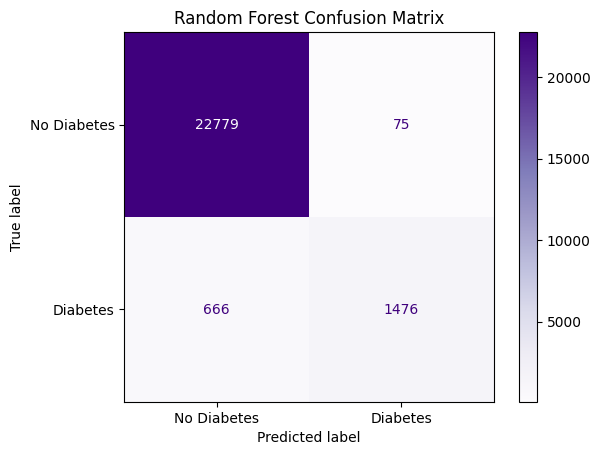

In [33]:
# Confusion Matrix Visualization
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Use actual class labels for display
class_names = ['No Diabetes', 'Diabetes']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Purples)  # You can choose a different colormap
plt.title("Random Forest Confusion Matrix")
plt.show()

Text(0.5, 1.0, 'HbA1c Level Distribution by Diabetes Status')

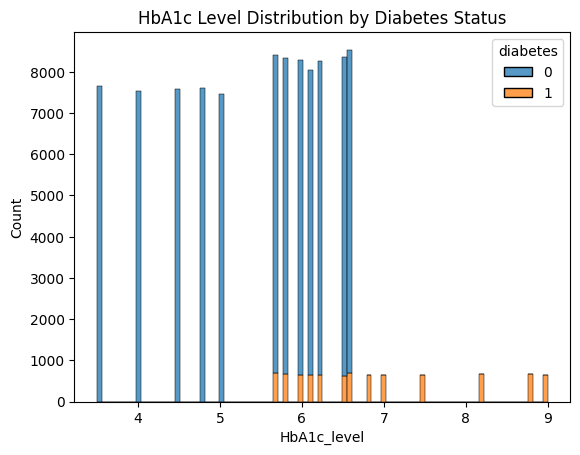

In [34]:
import seaborn as sns

hba1c_plot = sns.histplot(data=df, x='HbA1c_level', hue='diabetes', multiple='stack') #, palette='Set2')
hba1c_plot.set_title('HbA1c Level Distribution by Diabetes Status')

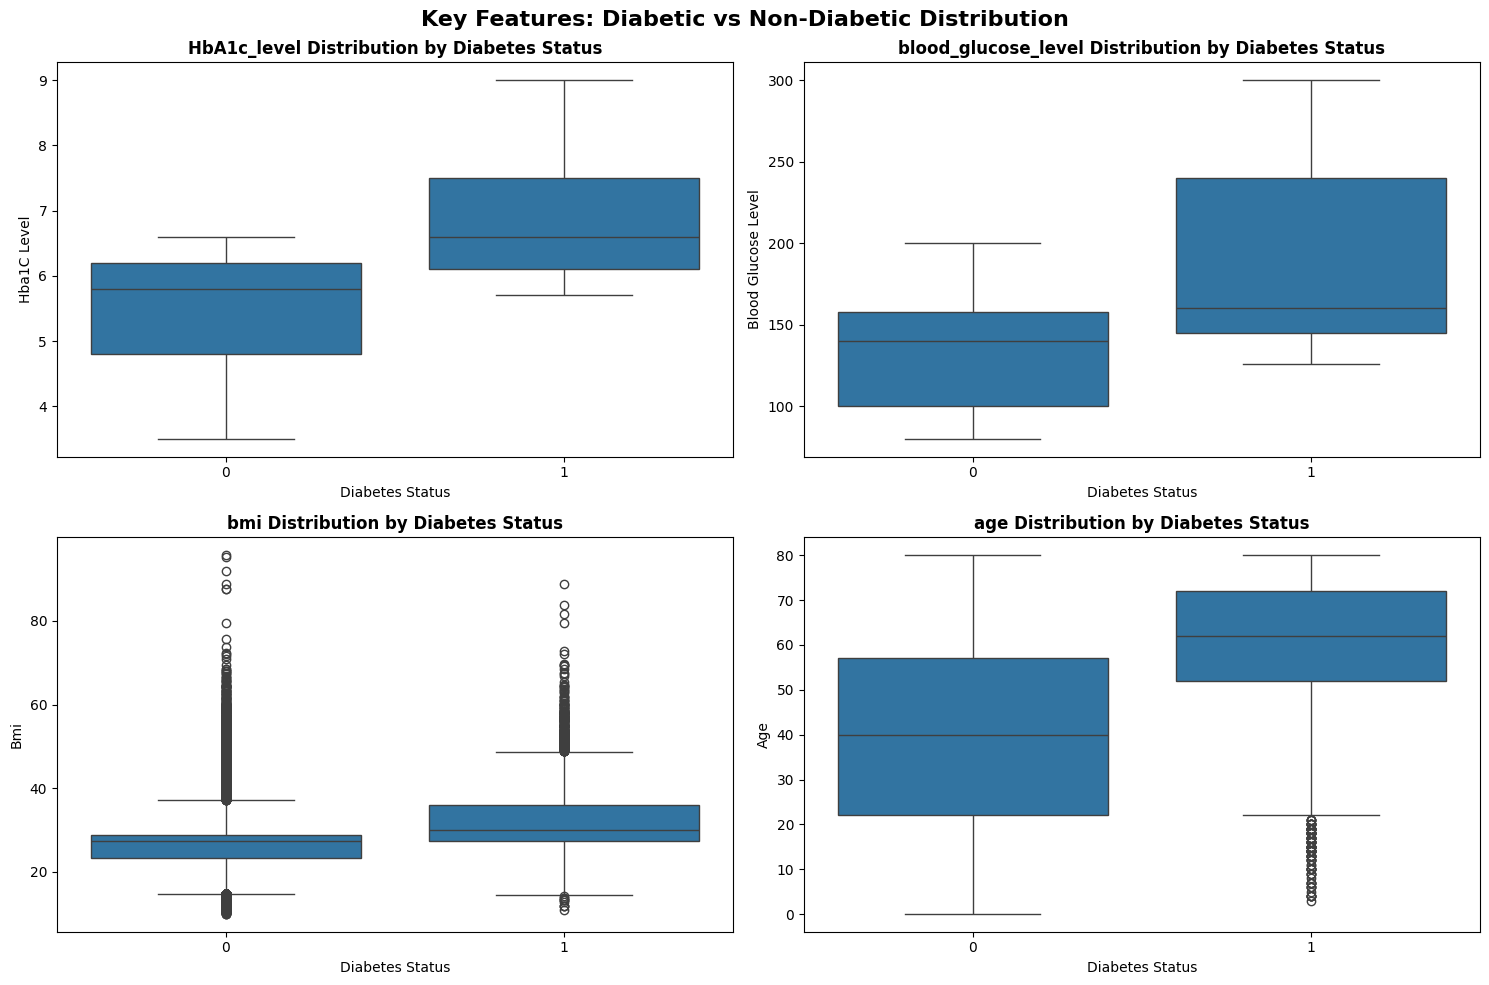

In [35]:
# 1. Box Plots - Best for showing distribution differences between diabetic and non-diabetic groups
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the subplot layout
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Key Features: Diabetic vs Non-Diabetic Distribution', fontsize=16, fontweight='bold')

# Key features to analyze
key_features = ['HbA1c_level', 'blood_glucose_level', 'bmi', 'age']

# Create box plots for each feature
for i, feature in enumerate(key_features):
    row = i // 2
    col = i % 2
    
    # Use original data with string labels for better readability
    plot_data = df.copy()
    
    sns.boxplot(data=plot_data, x='diabetes', y=feature, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} Distribution by Diabetes Status', fontweight='bold')
    axes[row, col].set_xlabel('Diabetes Status')
    axes[row, col].set_ylabel(feature.replace('_', ' ').title())

plt.tight_layout()
plt.show()

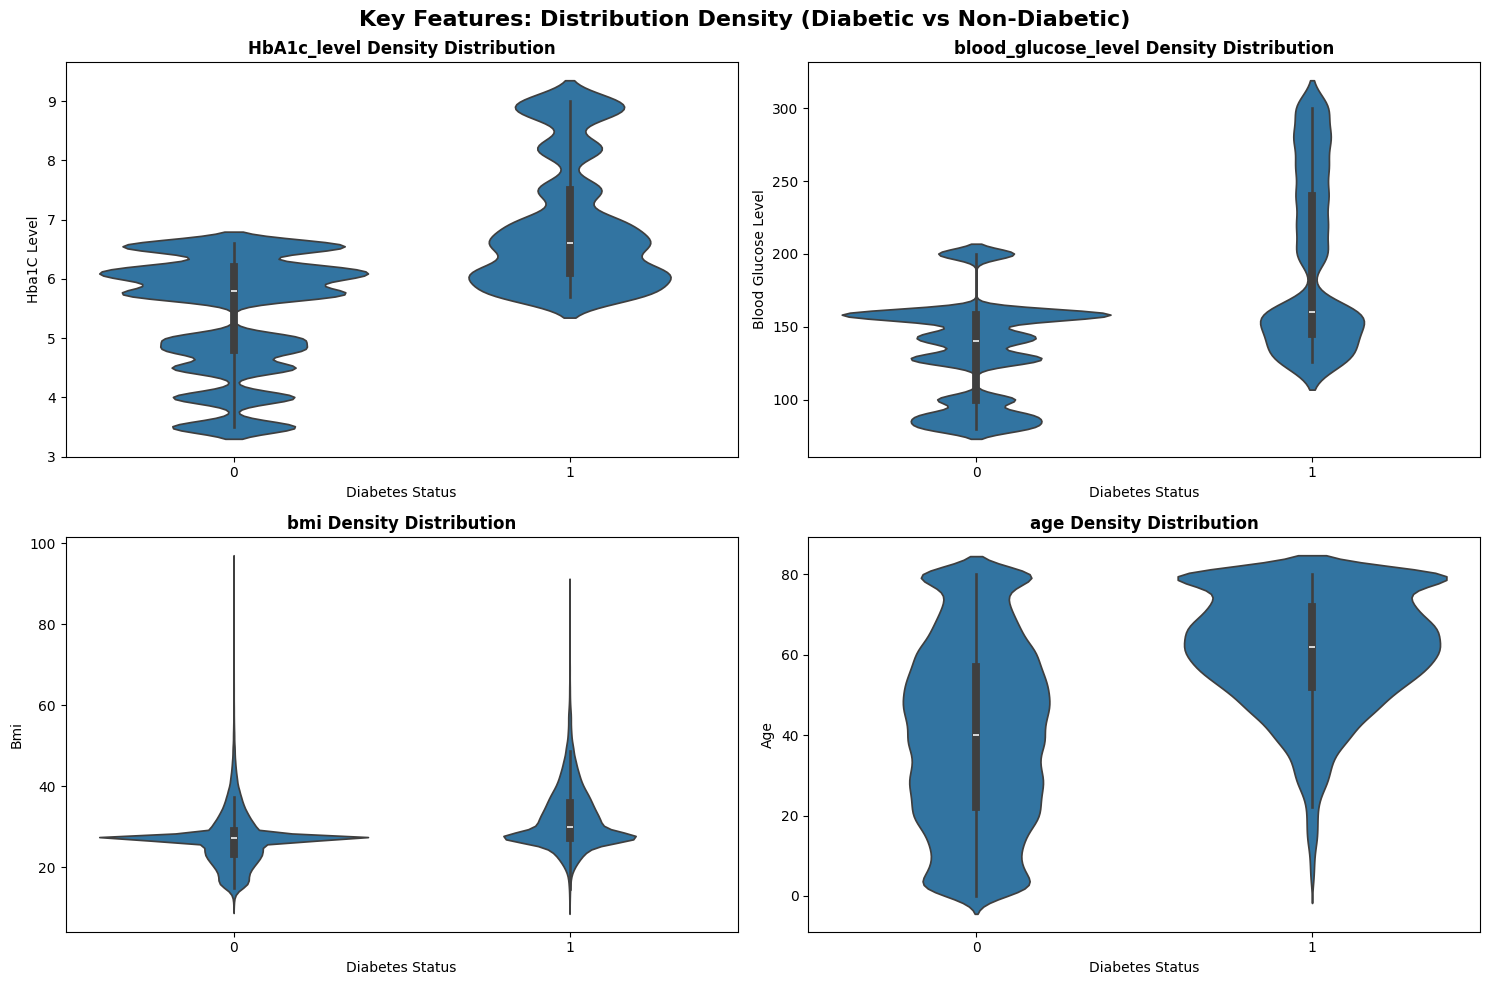

In [36]:
# 2. Violin Plots - Show distribution shape and density differences
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Key Features: Distribution Density (Diabetic vs Non-Diabetic)', fontsize=16, fontweight='bold')

for i, feature in enumerate(key_features):
    row = i // 2
    col = i % 2
    
    sns.violinplot(data=df, x='diabetes', y=feature, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} Density Distribution', fontweight='bold')
    axes[row, col].set_xlabel('Diabetes Status')
    axes[row, col].set_ylabel(feature.replace('_', ' ').title())

plt.tight_layout()
plt.show()

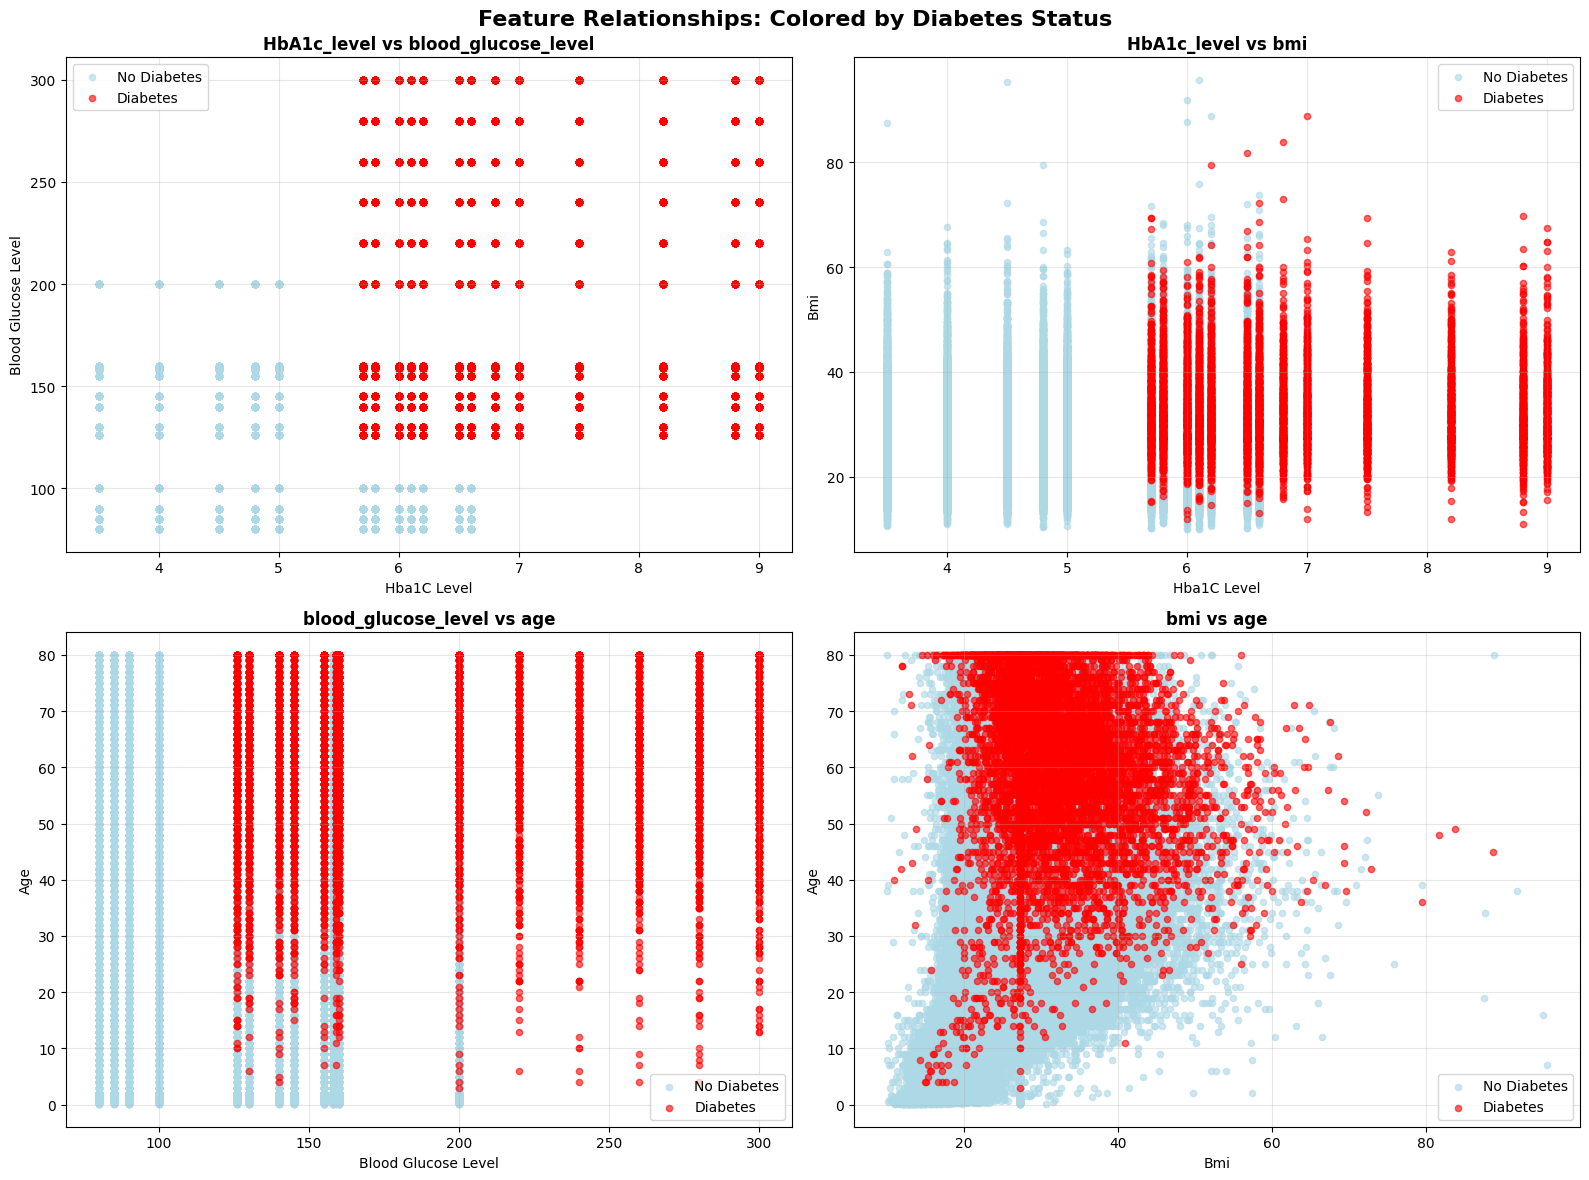

In [37]:
# 3. Scatter Plot Matrix - Show correlations between key features
# Create scatter plots showing relationships between features, colored by diabetes status
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Feature Relationships: Colored by Diabetes Status', fontsize=16, fontweight='bold')

# Define feature pairs for comparison
feature_pairs = [
    ('HbA1c_level', 'blood_glucose_level'),
    ('HbA1c_level', 'bmi'),
    ('blood_glucose_level', 'age'),
    ('bmi', 'age')
]

colors = ['lightblue', 'red']
labels = ['No Diabetes', 'Diabetes']

for i, (feature_x, feature_y) in enumerate(feature_pairs):
    row = i // 2
    col = i % 2
    
    # Plot for each diabetes status
    for diabetes_status in [0, 1]:
        subset = df[df['diabetes'] == diabetes_status]
        axes[row, col].scatter(subset[feature_x], subset[feature_y], 
                              c=colors[diabetes_status], label=labels[diabetes_status], 
                              alpha=0.6, s=20)
    
    axes[row, col].set_xlabel(feature_x.replace('_', ' ').title())
    axes[row, col].set_ylabel(feature_y.replace('_', ' ').title())
    axes[row, col].set_title(f'{feature_x} vs {feature_y}', fontweight='bold')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

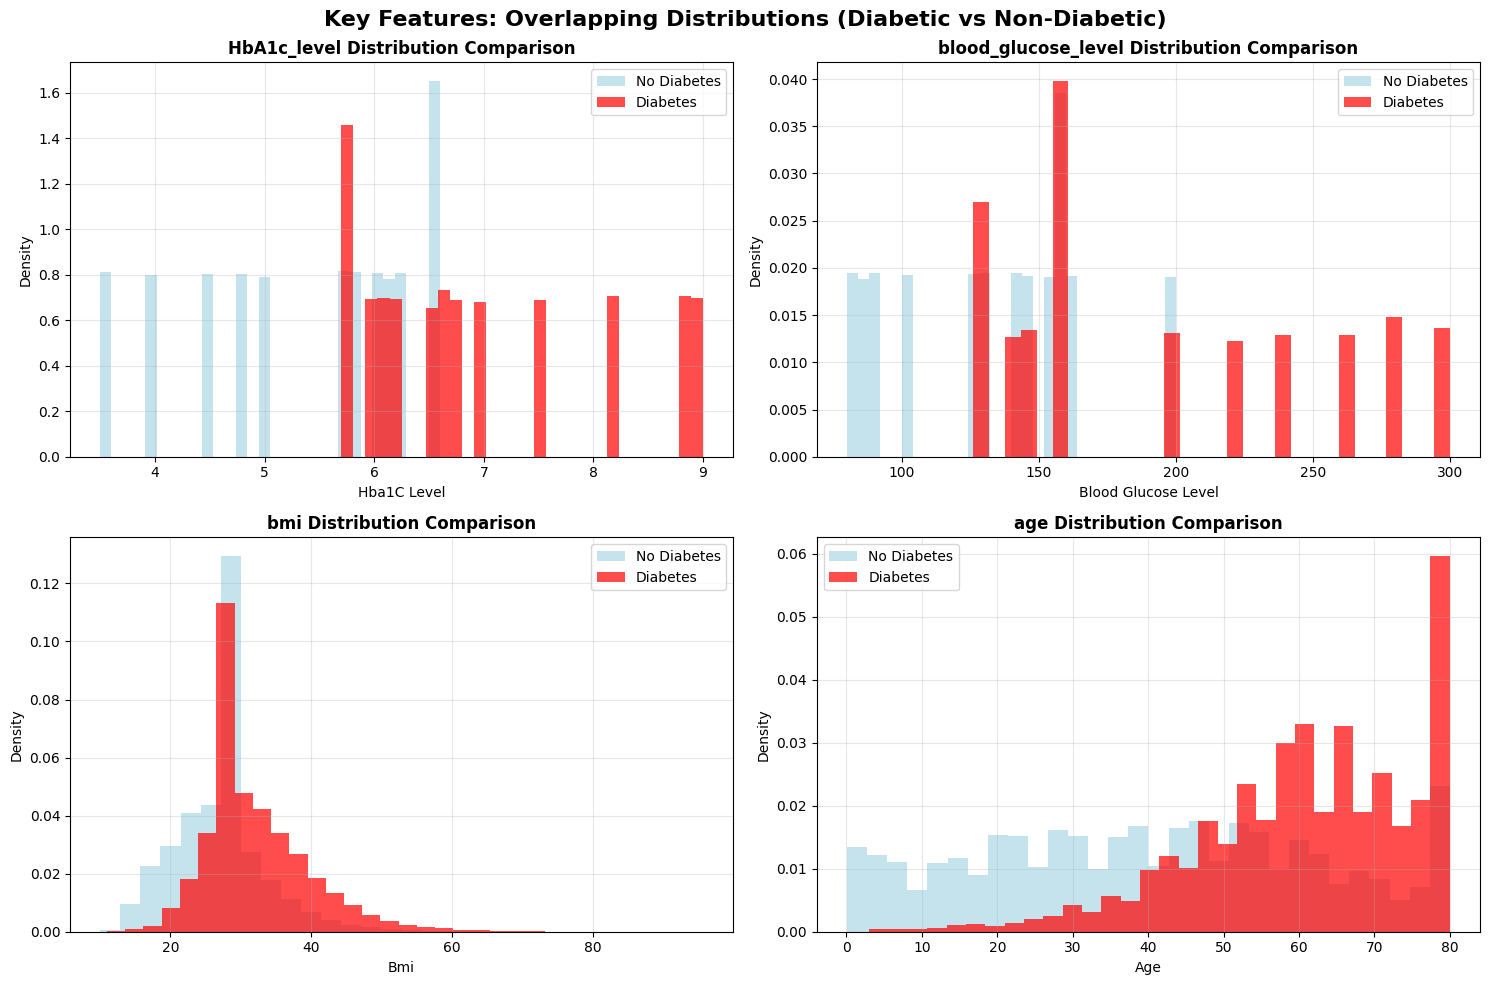

In [38]:
# 4. Histograms with Overlays - Show distribution overlaps
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Key Features: Overlapping Distributions (Diabetic vs Non-Diabetic)', fontsize=16, fontweight='bold')

for i, feature in enumerate(key_features):
    row = i // 2
    col = i % 2
    
    # Separate data by diabetes status
    no_diabetes = df[df['diabetes'] == 0][feature]
    diabetes = df[df['diabetes'] == 1][feature]
    
    # Create overlapping histograms
    axes[row, col].hist(no_diabetes, bins=30, alpha=0.7, label='No Diabetes', color='lightblue', density=True)
    axes[row, col].hist(diabetes, bins=30, alpha=0.7, label='Diabetes', color='red', density=True)
    
    axes[row, col].set_title(f'{feature} Distribution Comparison', fontweight='bold')
    axes[row, col].set_xlabel(feature.replace('_', ' ').title())
    axes[row, col].set_ylabel('Density')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

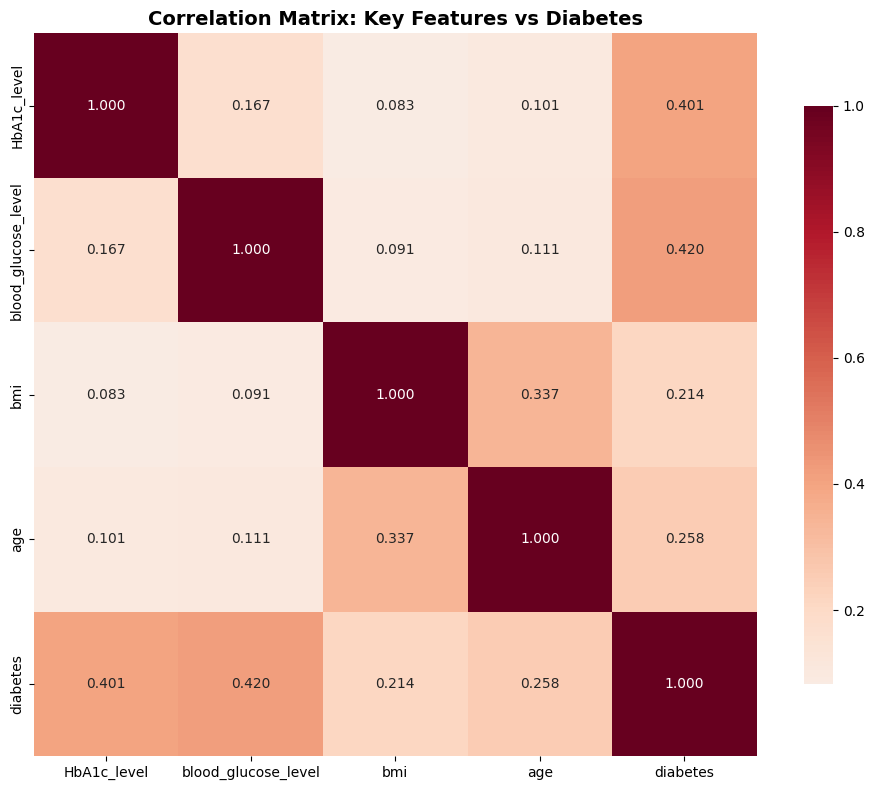

Correlation with Diabetes:
blood_glucose_level  : 0.4196
HbA1c_level          : 0.4007
age                  : 0.2580
bmi                  : 0.2144


In [39]:
# 5. Correlation Heatmap - Show relationships between all key features
plt.figure(figsize=(10, 8))

# Calculate correlation matrix for key features + diabetes
correlation_features = key_features + ['diabetes']
correlation_matrix = df[correlation_features].corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix: Key Features vs Diabetes', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print correlation with diabetes
print("Correlation with Diabetes:")
print("=" * 40)
diabetes_corr = correlation_matrix['diabetes'].sort_values(ascending=False)
for feature, corr in diabetes_corr.items():
    if feature != 'diabetes':
        print(f"{feature:20} : {corr:.4f}")

In [40]:
# 6. Summary Statistics Table - Quantitative comparison
print("📊 STATISTICAL SUMMARY: KEY FEATURES BY DIABETES STATUS")
print("=" * 70)

summary_stats = []
for feature in key_features:
    no_diabetes_stats = df[df['diabetes'] == 0][feature].describe()
    diabetes_stats = df[df['diabetes'] == 1][feature].describe()
    
    print(f"\n🔍 {feature.upper().replace('_', ' ')}")
    print("-" * 50)
    print(f"{'Statistic':<15} {'No Diabetes':<15} {'Diabetes':<15} {'Difference':<15}")
    print("-" * 60)
    
    stats_to_show = ['mean', 'std', '25%', '50%', '75%']
    for stat in stats_to_show:
        no_diab_val = no_diabetes_stats[stat]
        diab_val = diabetes_stats[stat]
        diff = diab_val - no_diab_val
        
        print(f"{stat:<15} {no_diab_val:<15.2f} {diab_val:<15.2f} {diff:<15.2f}")

# Key insights
print("\n\n🎯 KEY INSIGHTS:")
print("=" * 50)
print("• HbA1c_level: Diabetics have significantly higher levels")
print("• blood_glucose_level: Strong difference between groups")  
print("• bmi: Diabetics tend to have higher BMI")
print("• age: Diabetes is more common in older populations")
print("\nThese patterns confirm why these are the most important features!")

📊 STATISTICAL SUMMARY: KEY FEATURES BY DIABETES STATUS

🔍 HBA1C LEVEL
--------------------------------------------------
Statistic       No Diabetes     Diabetes        Difference     
------------------------------------------------------------
mean            5.40            6.93            1.54           
std             0.97            1.08            0.10           
25%             4.80            6.10            1.30           
50%             5.80            6.60            0.80           
75%             6.20            7.50            1.30           

🔍 BLOOD GLUCOSE LEVEL
--------------------------------------------------
Statistic       No Diabetes     Diabetes        Difference     
------------------------------------------------------------
mean            132.85          194.09          61.24          
std             34.25           58.64           24.39          
25%             100.00          145.00          45.00          
50%             140.00          160.00     